<h2 style="color:green" align="center">Implement Neural Network From Scratch for Gurmukhi Handwritten Digit Classification</h2>

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
from PIL import Image
import os

main_path = '/content/drive/MyDrive/GurNum-20230430T101123Z-001/GurNum/train'

images = []
number=[]
for num in range(10):
  path=os.path.join(main_path,str(num))
  for file in os.listdir(path):
    num_path = os.path.join(path, file)
    if num_path.endswith(('.tiff','.bmp')):
      img = Image.open(num_path)
      img_to_tensor = tf.convert_to_tensor(img)
      images.append(img_to_tensor)
      number.append(num)
images=np.array(images)
number=np.array(number)
images
number

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [74]:
from PIL import Image
import os

main_path = '/content/drive/MyDrive/GurNum-20230430T101123Z-001/GurNum/val'

val_images = []
val_number=[]
for num in range(10):
  path=os.path.join(main_path,str(num))
  for file in os.listdir(path):
    num_path = os.path.join(path, file)
    if num_path.endswith(('.tiff','.bmp')):
      img = Image.open(num_path)
      img_to_tensor = tf.convert_to_tensor(img)
      val_images.append(img_to_tensor)
      val_number.append(num)
val_images=np.array(val_images)
val_number=np.array(val_number)
val_images
val_number

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

In [75]:
np.save('x_test.npy', val_images)
np.save('y_test.npy', val_number)
np.save('x_train.npy', images)
np.save('y_train.npy', number)

x_train = np.load('x_train.npy',allow_pickle=True)
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy',allow_pickle=True)
y_test = np.load('y_test.npy')

(32, 32)
0
2


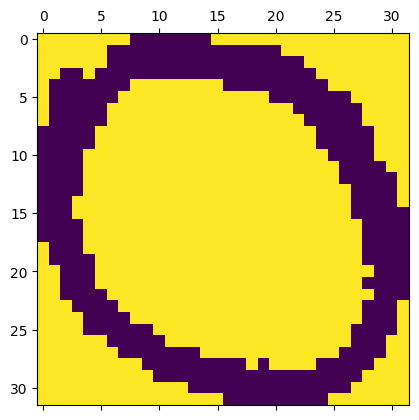

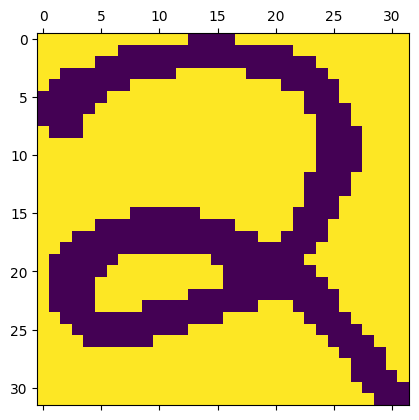

In [76]:
print(x_train[0].shape)
plt.matshow(x_train[0])
plt.matshow(x_train[250])
print(y_train[0])
print(y_train[250])


In [77]:
model = keras.Sequential([
keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 128.1005 - accuracy: 0.4290 - val_loss: 76.1277 - val_accuracy: 0.5730
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 19.5570 - accuracy: 0.8360 - val_loss: 37.1708 - val_accuracy: 0.7416
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 13.5184 - accuracy: 0.8690 - val_loss: 35.8241 - val_accuracy: 0.7640
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 8.6459 - accuracy: 0.9150 - val_loss: 29.2009 - val_accuracy: 0.7697
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 6.6150 - accuracy: 0.9340 - val_loss: 23.7292 - val_accuracy: 0.8090
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 4.2425 - accuracy: 0.9450 - val_loss: 20.1485 - val_accuracy: 0.8427
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 4.6764 - accuracy: 0.9430 - val_loss: 20.1266 - val_accuracy: 0.8876
Epoch 8/1

In [78]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 22.1612 - accuracy: 0.8596


[22.161237716674805, 0.8595505356788635]

In [79]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 0.8415 - accuracy: 0.7980 - val_loss: 1.2137 - val_accuracy: 0.6011
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.8865 - accuracy: 0.7560 - val_loss: 1.1320 - val_accuracy: 0.6404
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.8122 - accuracy: 0.8160 - val_loss: 1.0571 - val_accuracy: 0.7360
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7562 - accuracy: 0.8750 - val_loss: 1.0055 - val_accuracy: 0.7697
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7183 - accuracy: 0.8990 - val_loss: 0.9664 - val_accuracy: 0.8034
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.9280 - val_loss: 0.9398 - val_accuracy: 0.8315
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.9540 - val_loss: 0.9170 - val_accuracy: 0.8427
Epoch 8/10
32/32 [==

In [80]:
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.8786 - accuracy: 0.8539


[0.8786489367485046, 0.8539325594902039]

In [ ]:
y_predicted=model.predict(x_test_scaled)
y_predicted_values=[]
for i in y_predicted:
  y_predicted_values.append(np.argmax(i))
y_predicted_values

1


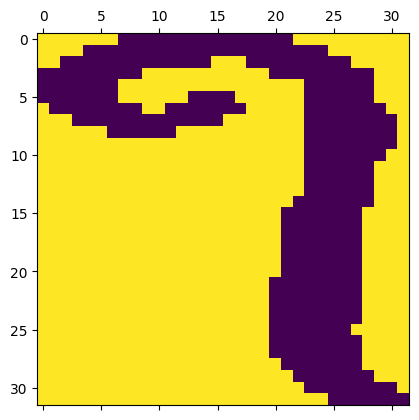

In [82]:
plt.matshow(x_test_scaled[20])
print(y_predicted_values[20])


In [83]:
confusion_matrix_sigmoid=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_values)
confusion_matrix_sigmoid

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[15,  1,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  9,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0, 12,  0,  1,  1,  0,  1,  0,  2],
       [ 0,  0,  3, 10,  0,  1,  1,  1,  0,  1],
       [ 0,  0,  0,  0, 16,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

In [84]:
print(classification_report(y_test,y_predicted_values))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.75      0.56      0.64        16
           2       0.80      0.71      0.75        17
           3       1.00      0.59      0.74        17
           4       0.94      0.89      0.91        18
           5       0.86      1.00      0.92        18
           6       0.95      1.00      0.97        18
           7       0.62      0.89      0.73        18
           8       0.95      1.00      0.97        18
           9       0.83      1.00      0.91        20

    accuracy                           0.85       178
   macro avg       0.87      0.85      0.85       178
weighted avg       0.87      0.85      0.85       178



In [85]:
model_relu = keras.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
keras.layers.Dense(10, activation='softmax')
])
model_relu.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
history = model_relu.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 2s 33ms/step - loss: 2.2528 - accuracy: 0.3810 - val_loss: 2.1956 - val_accuracy: 0.6517
Epoch 2/10
32/32 [==============================] - 0s 15ms/step - loss: 2.0627 - accuracy: 0.7870 - val_loss: 1.9771 - val_accuracy: 0.6854
Epoch 3/10
32/32 [==============================] - 1s 16ms/step - loss: 1.7343 - accuracy: 0.8380 - val_loss: 1.6569 - val_accuracy: 0.7865
Epoch 4/10
32/32 [==============================] - 1s 17ms/step - loss: 1.3433 - accuracy: 0.8560 - val_loss: 1.3402 - val_accuracy: 0.7978
Epoch 5/10
32/32 [==============================] - 1s 16ms/step - loss: 1.0143 - accuracy: 0.9140 - val_loss: 1.0851 - val_accuracy: 0.8427
Epoch 6/10
32/32 [==============================] - 1s 17ms/step - loss: 0.7782 - accuracy: 0.9200 - val_loss: 0.9070 - val_accuracy: 0.8596
Epoch 7/10
32/32 [==============================] - 0s 15ms/step - loss: 0.6082 - accuracy: 0.9280 - val_loss: 0.7751 - val_accuracy: 0.8315
Epoch 8/10
32

In [86]:
model_relu.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.5323 - accuracy: 0.8933


[0.532335102558136, 0.8932584524154663]

In [ ]:
y_predicted1=model_relu.predict(x_test_scaled)
y_predicted1_values=[]
for i in y_predicted:
  y_predicted1_values.append(np.argmax(i))
y_predicted1_values

2


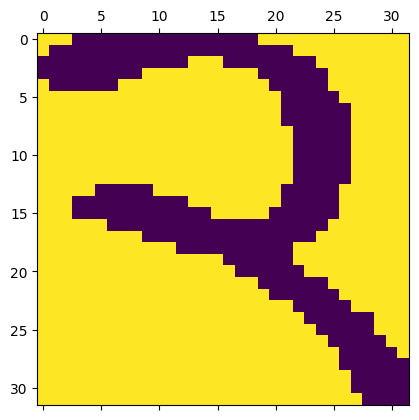

In [88]:
plt.matshow(x_test_scaled[50])
print(y_predicted1_values[50])


In [89]:
confusion_matrix_relu=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted1_values)
confusion_matrix_relu

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[15,  1,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  9,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0, 12,  0,  1,  1,  0,  1,  0,  2],
       [ 0,  0,  3, 10,  0,  1,  1,  1,  0,  1],
       [ 0,  0,  0,  0, 16,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

In [90]:
print(classification_report(y_test,y_predicted1_values))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.75      0.56      0.64        16
           2       0.80      0.71      0.75        17
           3       1.00      0.59      0.74        17
           4       0.94      0.89      0.91        18
           5       0.86      1.00      0.92        18
           6       0.95      1.00      0.97        18
           7       0.62      0.89      0.73        18
           8       0.95      1.00      0.97        18
           9       0.83      1.00      0.91        20

    accuracy                           0.85       178
   macro avg       0.87      0.85      0.85       178
weighted avg       0.87      0.85      0.85       178

